# <center>Weekly Python</center>

## Week 1

#### Tuples that add up to a given number

In [3]:
def magic_tuple(to_this, below_this):
    if below_this > to_this: 
        raise ValueError('The second number should be less than the first number.')
    else:
        for i in range(below_this-1, to_this-below_this,-1):
            if to_this - i < below_this:
                yield (i, to_this-i)

In [4]:
for x in magic_tuple(10, 8):
    print(x)

(7, 3)
(6, 4)
(5, 5)
(4, 6)
(3, 7)


## Week 2

#### Classes with formatting

In [17]:
class Item:
    def __init__(self, quantity, measure, name, price):
        self.name = name
        self.quantity = quantity
        self.measure = measure
        self.price = price 
    
    def __str__(self):
        return (f'{self.quantity:>5} '
                f'{self.measure:<5} '
                f'{self.name:<10} @ $ '
                f'{self.price:.1f}...$ '
                f'{self.price*self.quantity:.1f} ')

    
    
class Cart:
    def __init__(self):
        self.items = []
    
    def add(self, item):
        self.items.append(item)
    
    def __format__(self, format_spec):
        if format_spec == 'short':
            return ', '.join([f'{item.name}' for item in sorted(self.items, key = lambda a: a.name)])
        elif format_spec == 'long':
            return '\n'.join([f'\t{item}' for item in sorted(self.items, key = lambda a: a.name)])   

In [18]:
cart = Cart()

In [19]:
cart.add(Item(1.5, 'kg', 'tomatoes', 5))
cart.add(Item(2.0, 'kg','cucumbers', 4))

In [21]:
print(f'Your cart contains {cart:short}')

Your cart contains cucumbers, tomatoes


## Week 3 

#### Reading files, threading

In [10]:
# in a function
import glob
def count_words(address):
    lines = 0
    nwords = 0
    
    for file in list(glob.glob(address)):
        reader = open(file)
        with reader:
            for line in reader:
                words = line.split()
                lines+=1
                nwords += len(words)
    print("The number of words in all files is {}".format(nwords))
    

In [11]:
count_words("/Applications/Python 2.7/Extras/Demo/turtle/*.txt")

The number of words in all files is 1019


#### With Threading

In [13]:
import threading

In [ ]:
def count_words_t(address):
    lines = 0
    nwords = 0
    
    for file in list(glob.glob(address)):
        reader = open(file)
        with reader:
            for line in reader:
                words = line.split()
                lines+=1
                nwords += len(words)
    print("The number of words in all files is {}".format(nwords))

loc = '/Applications/Python 2.7/Extras/Demo/turtle/*.txt'
t = threading.Thread(target = count_words_t, name = 'thread1',
                    args=(loc))
t.start()
t.join()

In [30]:
# just making a non-threading cased work
import glob

lines = 0
nwords = 0
# glob.glob("/Applications/Python 2.7/Extras/Demo/turtle/*.txt") # getting all txt files in a folder
for file in list(glob.glob("/Applications/Python 2.7/Extras/Demo/turtle/*.txt")):
    reader = open(file)
    with reader:
        for line in reader:
            words = line.split()
            lines+=1
            nwords += len(words)
print("The number of words in all files is {}".format(nwords))

The number of words in all files is 1019


## Week 4

#### Password checker

In [ ]:
# function will take four parameters: min_uppercase, min_lowercase, min_punctuation, and min_digits. 
# These four parameters represent the minimum number of uppercase, lowercase, punctuation, and digits needed for a password
# to be considered good.

# The output from this create_password_checker is a function, one which takes a potential password (string) as its input,
# and returns a two-element tuple: The first is a boolean value, indicating whether the password passed the validation test.
# The second element of the tuple is a dictionary whose keys are "uppercase", "lowercase", "punctuation", and "digits" and
# whose values represent by how much we've exceeded the minimum. If we haven't achieved the minimum, then the value will 
# be a negative number.

In [3]:
import string
def create_password_checker(min_uppercase, min_lowercase, min_punctuation, min_digits):
    def checker(read_str):
        dict_to_return = {
            "uppercase": uppercase_num - min_uppercase,
            "lowercase": lowercase_num - min_lowercase,
            "punctuation": punct_num - min_punctuation,
            "digits": digits_num - min_digits
        }
        for i in read_str:
            if i.isupper():
                uppercase_num+=1
            elif i.islower():
                lowercase_num+=1
            elif c in string.punctuation():
                punct_num+=1
            elif i.isdigit():
                digits_num+=1
        summary = sum(value>=0 for value in dict_to_return.values() == len(dict_to_return.keys()))
        return summary, dict_to_return
     return checker 
            

## Week 6

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import random
from random import randint
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
# Without 1K iterations
flips = [randint(0,1) for r in range(101)]
results = []
heads, tails = 0,0 
for obj in flips:
    if obj == 0:
        results.append('heads')
        heads+=1
    else: 
        results.append('tails')
        tails+=1

In [22]:
# Checking the result
Counter(results)
print("heads are {},tails are {}".format(heads,tails))

Counter({'tails': 50, 'heads': 51})

heads are 51,tails are 50


In [25]:
def exper():
    exper_n = 0
    for i in range(1001):
        flips = [randint(0,1) for r in range(101)]
        results, heads, tails = [], 0, 0
        for obj in flips:
            if obj == 0:
                results.append('heads')
                heads+=1
            else: 
                results.append('tails')
                tails+=1
        if heads == 57:
            exper_n+=1
    return exper_n

In [26]:
exper()

30

In [11]:
# The main function
def exper():
    a = range(35,66)
    global my_d # making the dictionary global in order to build a bar chart later 
    my_d = dict.fromkeys(a,0)
    for i in range(1001):
        flips = [randint(0,1) for r in range(101)]
        results, heads, tails = [], 0, 0
        for obj in flips:
            if obj == 0:
                results.append('heads')
                heads+=1
            else: 
                results.append('tails')
                tails+=1
        for j in my_d.keys():
            if j == heads:
                my_d[j]+=1
    return my_d        

In [12]:
exper()

{35: 0,
 36: 1,
 37: 3,
 38: 2,
 39: 3,
 40: 6,
 41: 10,
 42: 15,
 43: 25,
 44: 38,
 45: 37,
 46: 51,
 47: 80,
 48: 74,
 49: 90,
 50: 72,
 51: 72,
 52: 78,
 53: 73,
 54: 67,
 55: 44,
 56: 51,
 57: 26,
 58: 33,
 59: 18,
 60: 10,
 61: 10,
 62: 4,
 63: 5,
 64: 2,
 65: 1}

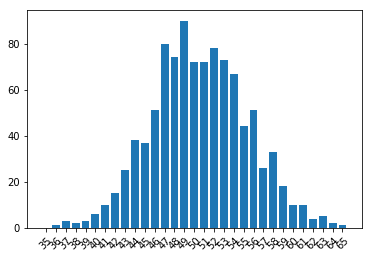

In [14]:
plt.bar(range(len(my_d)), list(my_d.values()), align='center')
plt.xticks(range(len(my_d)), list(my_d.keys()), rotation = 45)
plt.show()
